# Зачётная работа по курсу «Системы компьютерной математики»
*Горбачев А. А., 381908-1*

## Постановка задачи
### 18. Модель Вольтерра–Лотке
Рассмотрите *модель хищник–жертва* Вольтерра́–Лотке простой экосистемы
$$
\left\{
\begin{array}{l}
\frac{\displaystyle dr}{\displaystyle dt} = 2r - \alpha r f, \\[.5em]
\frac{\displaystyle df}{\displaystyle dt} = -f + \alpha r f, 
\end{array}
\right.
$$
$$
r(0) = r_0,\qquad
f(0) = f_0,
$$
где
$f$ – численность лис,
$r$ – численность кроликов
($\alpha$, например, $0.01$;
$r_0$, $f_0$ могут изменяться от нескольких единиц до нескольких тысяч) 

Напишите функцию, на вход которой можно подавать величины $\alpha$, $r_0$, $f_0$.
По заданным параметру и начальным условиям функция должна строить
три графика: графики зависимости $f(t)$, $r(t)$ и
*фазовую траекторию* (траекторию в плоскости $(r,f)$). 
Обратите внимание, что $r(t)\ge 0$, $f(t)\ge 0$.

Экспериментально попытайтесь найти все качественно различные фазовые траектории.
Изобразите *фазовый портрет* – коллекцию фазовых траекторий. 
Каков содержательный смысл в соответствующих этим траекториям решениях?



## Решение

In [278]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from ipywidgets import interact

In [279]:
# Функция, вычисляющая правую часть системы
def vl_model(t, y, alpha):
    r, f = y
    dr_dt = 2*r - alpha*r*f
    df_dt = -f + alpha*r*f
    return dr_dt, df_dt

In [280]:
# Функция, требуемая в задании
def vl_graphs(alpha = .01, r0 = 100, f0 = 50):
    
    # Массив точек
    T = 50
    tt = np.linspace(0, T, 2000)
    
    # Вызов решателя
    sol = integrate.solve_ivp(lambda t, y: vl_model(t, y, alpha), [0, T], [r0, f0], t_eval = tt)
    
    # Визуализация решения
    plt.plot(tt, sol.y[0], 'g', label = 'Rabbits')
    plt.plot(tt, sol.y[1], 'r', label = 'Foxes')
    plt.xlabel('t')
    plt.legend()
    plt.grid()
    
    # Переход на новое окно
    plt.figure()
    
    # Фазовая траектория
    plt.plot(sol.y[0], sol.y[1], 'b', label = 'Phase trajectory')
    plt.xlabel('r')
    plt.ylabel('f')
    plt.legend()
    plt.grid()

In [281]:
# Интерактивная модель
interact(vl_graphs, alpha = (0, 1, .01), r0 = (0, 100, 1), f0 = (0, 100, 1))
pass

interactive(children=(FloatSlider(value=0.01, description='alpha', max=1.0, step=0.01), IntSlider(value=100, d…

Наблюдения:
* Изменение численности популяций циклично
* В среднем кроликов меньше, чем лис

In [282]:
# Функция, изображающая только фазовую траекторию
def vl_phase_trajectory(alpha, r0, f0):
    T = 50
    tt = np.linspace(0, T, 1000)
    sol = integrate.solve_ivp(lambda t, y: vl_model(t, y, alpha), [0, T], [r0, f0], t_eval = tt)
    plt.plot(sol.y[0], sol.y[1])

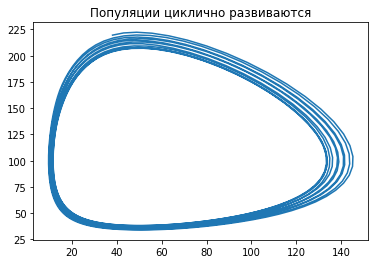

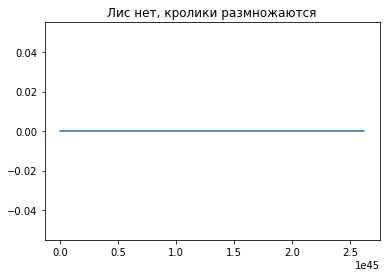

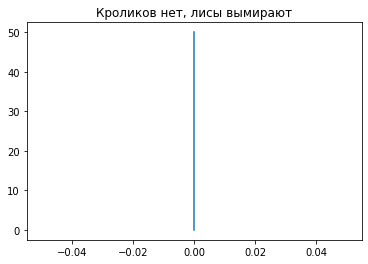

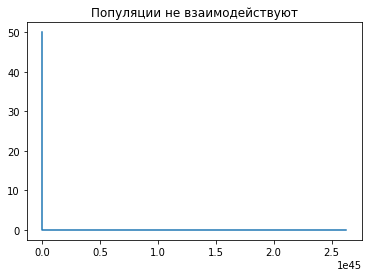

In [283]:
# Качественно различные фазовые траектории
vl_phase_trajectory(.02, 100, 50)
plt.title('Популяции циклично развиваются')
plt.figure()
vl_phase_trajectory(.02, 100, 0)
plt.title('Лис нет, кролики размножаются')
plt.figure()
vl_phase_trajectory(.02, 0, 50)
plt.title('Кроликов нет, лисы вымирают')
plt.figure()
vl_phase_trajectory(0, 100, 50)
plt.title('Популяции не взаимодействуют')
pass

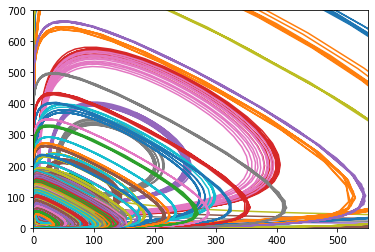

In [284]:
# Фазовый портрет
A = np.arange(0, .2, .01)
R = F = np.array([1, 50, 100])
plt.axis([0, 550, 0, 700])
for i in range(0, A.size):
    for j in range(0, R.size):
        for k in range(0, F.size):
            vl_phase_trajectory(A[i], R[j], F[k])
# P.S. Алгоритм выполняется долго, решить эту проблему не получилось

## Вывод
В данной работе была рассмотрена упрощённая модель хищник-жертва Вольтерра-Лотке, с помощью неё была описана и исследована экосистема, состоящая из двух популяций, а именно:
* создана интерактивная модель
* выявлены несколько отличающихся друг от друга состояний
* построен фазовый портрет

Что касается математической составляющей работы, она сводится к решению задачи Коши с последующей визуализацией.